In [222]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [223]:
import matplotlib as mpl

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [224]:
pwd

'/Users/gyeonghankim/Python/Machine_learning'

In [225]:
oecd_bli = pd.read_csv('./data/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('./data/gdp_per_capita.csv', thousands=',', delimiter = '\t', encoding = 'latin1',
                            na_values = 'n/a')

In [146]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [87]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [88]:
oecd_bli = oecd_bli.pivot(index = 'Country', columns = 'Indicator', values='Value')

In [89]:
gdp_per_capita.rename(columns={'2015' : 'GDP per capita'}, inplace = True)
gdp_per_capita.set_index('Country', inplace = True)
full_country_stats = pd.merge(left = oecd_bli, right = gdp_per_capita, left_index = True, right_index = True)

full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0


In [90]:
full_country_stats.sort_values(by = 'GDP per capita', inplace = True)
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [91]:
remove_indices = [0,1,6,8,33,34,35]

keep_indices = list(set(range(36)) - set(remove_indices))

full_country_stats = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

full_country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [226]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index = 'Country', columns = 'Indicator', values='Value')
    gdp_per_capita.rename(columns={'2015' : 'GDP per capita'}, inplace = True)
    gdp_per_capita.set_index('Country', inplace = True)
    full_country_stats = pd.merge(left = oecd_bli, right = gdp_per_capita, left_index = True, right_index = True)
    full_country_stats.sort_values(by = 'GDP per capita', inplace = True)
    
    remove_indices = [0,1,6,8,33,34,35]

    keep_indices = list(set(range(36)) - set(remove_indices))

   

    full_country_stats = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]
    
    return full_country_stats 
    
    

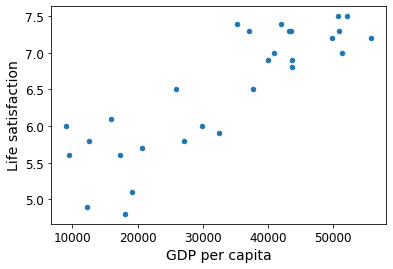

In [227]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

country_stats.plot(kind ='scatter', x='GDP per capita', y='Life satisfaction')

plt.show()

In [228]:
X = country_stats[['GDP per capita']]
y = country_stats['Life satisfaction']

model = sklearn.linear_model.LinearRegression()
model.fit(X,y)

X_new = [[22587]]

print(model.predict(X_new))
X.shape

[5.96242338]


(29, 1)

In [230]:
import numpy as np
import scipy as sp

In [231]:
data = np.array([2,3,3,4,4,4,4,5,5,6])
data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [232]:
mu = np.sum(data) / len(data)
mu

4.0

In [233]:
np.mean(data)

4.0

In [234]:
data - mu

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [235]:
(data-mu)**2

array([4., 1., 1., 0., 0., 0., 0., 1., 1., 4.])

In [237]:
sigma2 = np.sum((data-mu)**2) / len(data)

sigma2

1.2

In [238]:
np.var(data)

1.2

In [240]:
# 불편분산

sigma2 = np.sum((data-mu)**2) / (len(data) -1)
sigma2

1.3333333333333333

In [241]:
np.var(data , ddof = 1)

1.3333333333333333

In [242]:
sigma = np.sqrt(sigma2)

In [244]:
np.std(data, ddof = 1)

1.1547005383792515

In [246]:
import seaborn as sns

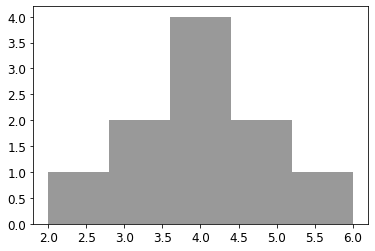

In [249]:
sns.distplot(data, bins =5, color = 'black', kde = False);

/Users/gyeonghankim/opt/anaconda3/envs/dss20/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


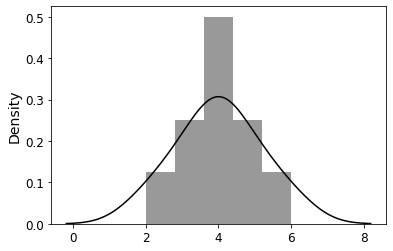

In [251]:
sns.distplot(data , bins=5, color  = 'black');

In [252]:
fish_multi = pd.read_csv("./data/3-3-2-fish_multi_2.csv")
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [253]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [267]:
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']
length_b

10    5
11    6
12    6
13    7
14    7
15    7
16    7
17    8
18    8
19    9
Name: length, dtype: int64

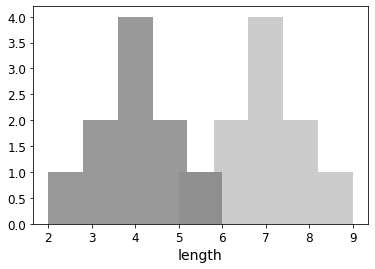

In [256]:
sns.distplot(length_a, bins = 5, color = 'black', kde = False)
sns.distplot(length_b, bins = 5, color = 'gray', kde = False);

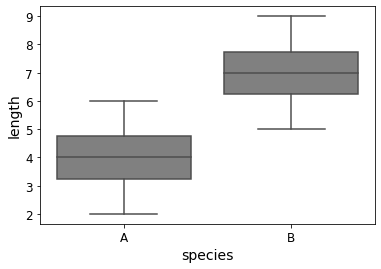

In [258]:
sns.boxplot(x='species', y='length', data = fish_multi, color = 'gray');

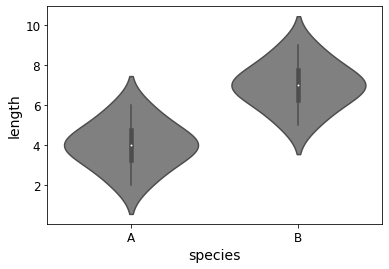

In [259]:
sns.violinplot(x='species', y='length', data = fish_multi, color = 'gray');

In [262]:
cov_data = pd.read_csv('./data/3-2-3-cov.csv')
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


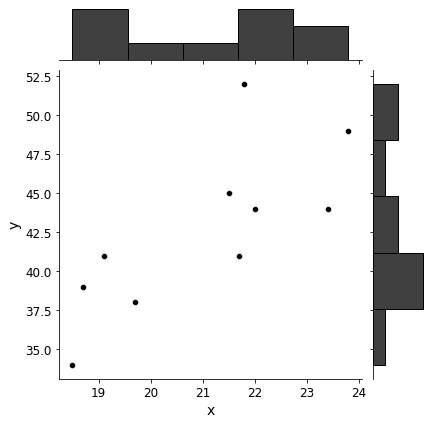

In [265]:
sns.jointplot(x= 'x', y = "y", data = cov_data, color = 'black');

In [268]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

In [269]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [270]:
np.random.choice(fish_5, size=1 , replace = False)

array([3])

In [271]:
np.random.choice(fish_5, size=3 , replace = False)

array([6, 4, 5])

In [272]:
np.random.seed(13)
np.random.choice(fish_5, size=3 , replace = False)

array([3, 5, 6])

In [275]:
np.random.seed(13)
data = (np.random.choice(fish_5, size=3 , replace = False))
print(data)
np.mean(data)

[3 5 6]


4.666666666666667

In [276]:
fish_100 = pd.read_csv('./data/3-4-1-fish_length_100000.csv')['length']

In [277]:
sample_result = np.random.choice(fish_100, size = 10, replace = False)
sample_result

array([4.75108188, 4.37498586, 3.78013026, 2.96949093, 2.68097807,
       5.00637838, 4.31302466, 3.46929683, 5.16443516, 3.2858849 ])

In [278]:
np.mean(sample_result)

3.9795686948818956

In [279]:
np.mean(fish_100)

4.000000000000001

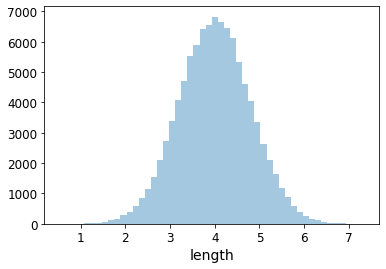

In [282]:
sns.distplot(fish_100, kde = False);

In [283]:
np.var(fish_100, ddof= 0)

0.64

In [284]:
x= np.arange(1,7.1, 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [286]:
stats.norm.pdf(x=x, loc= 4, scale = 0.8)

array([4.40744603e-04, 6.98826903e-04, 1.09085337e-03, 1.67639859e-03,
       2.53631007e-03, 3.77782254e-03, 5.53981051e-03, 7.99765039e-03,
       1.13669531e-02, 1.59052270e-02, 2.19103756e-02, 2.97148760e-02,
       3.96745648e-02, 5.21512316e-02, 6.74887081e-02, 8.59828448e-02,
       1.07846649e-01, 1.33172835e-01, 1.61896995e-01, 1.93765332e-01,
       2.28311357e-01, 2.64845807e-01, 3.02463406e-01, 3.40068748e-01,
       3.76421790e-01, 4.10201211e-01, 4.40081658e-01, 4.64818867e-01,
       4.83335146e-01, 4.94797109e-01, 4.98677851e-01, 4.94797109e-01,
       4.83335146e-01, 4.64818867e-01, 4.40081658e-01, 4.10201211e-01,
       3.76421790e-01, 3.40068748e-01, 3.02463406e-01, 2.64845807e-01,
       2.28311357e-01, 1.93765332e-01, 1.61896995e-01, 1.33172835e-01,
       1.07846649e-01, 8.59828448e-02, 6.74887081e-02, 5.21512316e-02,
       3.96745648e-02, 2.97148760e-02, 2.19103756e-02, 1.59052270e-02,
       1.13669531e-02, 7.99765039e-03, 5.53981051e-03, 3.77782254e-03,
      

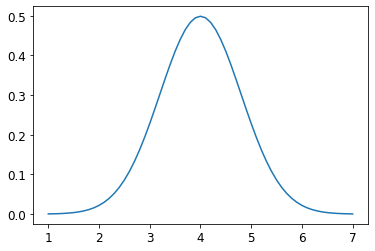

In [291]:
plt.plot(x, stats.norm.pdf(x=x, loc= 4, scale = 0.8));

/Users/gyeonghankim/opt/anaconda3/envs/dss20/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


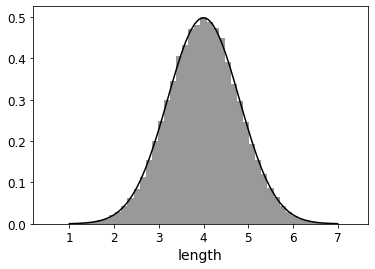

In [294]:
sns.distplot(fish_100, kde = False, color = 'black', norm_hist = True)
plt.plot(x, stats.norm.pdf(x=x, loc= 4, scale = 0.8), color = 'black');

In [295]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

In [297]:
population = stats.norm(loc = 4, scale = 0.8)


In [298]:
# 평균이 4고 표준편차가 0.8인 숫자 10개를 추출을 10000번 실행하여 평균을 냄 

sample_mean_array = np.zeros(10000)
np.random.seed(13)

for i in range(0,10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = np.mean(sample)


In [299]:
sample_mean_array

array([4.3976666 , 4.18857764, 3.8425394 , ..., 4.12495865, 4.12127892,
       4.05054023])

In [304]:
np.mean(sample_mean_array)

4.003651723722899

In [305]:
np.std(sample_mean_array, ddof = 0)

0.25328735533634056

In [306]:
np.std(sample_mean_array, ddof = 1)

0.25330002065401414

/Users/gyeonghankim/opt/anaconda3/envs/dss20/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


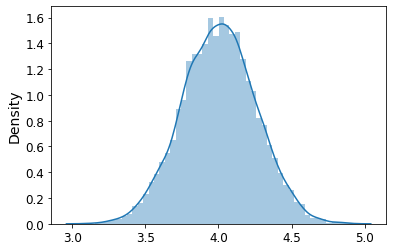

In [307]:
sns.distplot(sample_mean_array);

In [308]:
size_array = np.arange(10,100100, 100)

sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(13)

for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

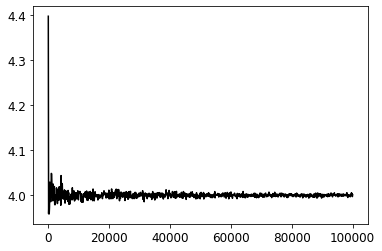

In [309]:
plt.plot(size_array, sample_mean_array_size, color = 'black');

In [329]:
def calc_sample_means(size, n_trial):
    
    sample_mean_array_size = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = np.mean(sample)
    
    return(sample_mean_array)

In [330]:

size_array = np.arange(12, 102, 2)
size_array

array([ 12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,
        38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,
        64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,  88,
        90,  92,  94,  96,  98, 100])

In [331]:
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(13)

for i in range(0, len(size_array)):
    
    sample_mean = calc_sample_means(size=size_array[i], n_trial =100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof = 1)

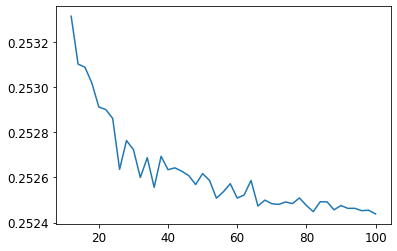

In [335]:
plt.plot(size_array, sample_mean_std_array)

In [353]:
SE = 0.8/np.sqrt(size_array)
SE

array([0.25298221, 0.07627701, 0.05520524, ..., 0.00253223, 0.00253096,
       0.0025297 ])

ValueError: x and y must have same first dimension, but have shapes (1001,) and (45,)

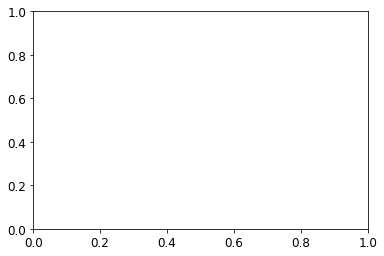

In [354]:

plt.plot(size_array, sample_mean_std_array)
plt.plot(size_array, SE, linestyle = 'dotted');

In [342]:
sample_var_array = np.zeros(10000)
np.random.seed(13)

for i in range(0,10000):
    sample = population.rvs(size =10)
    sample_var_array[i] = np.var(sample, ddof = 0)
    
np.mean(sample_var_array)

0.5792337629333761

In [345]:
unbias_var_array = np.zeros(10000)
np.random.seed(13)

for i in range(0,10000):
    sample = population.rvs(size =10)
    unbias_var_array[i] = np.var(sample, ddof = 1)
    
np.mean(unbias_var_array)

0.6435930699259735

In [347]:
size_array = np.arange(10,100100,100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [351]:
unbias_var_array_size = np.zeros(len(size_array))
np.random.seed(13)

for i in range(0,len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof = 1)
    


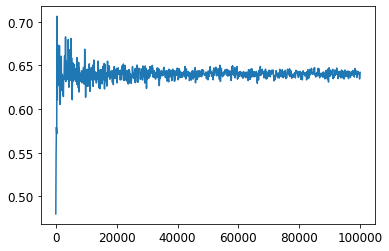

In [352]:
plt.plot(size_array, unbias_var_array_size);